<a href="https://colab.research.google.com/github/Aashrut/Machine-Learning/blob/master/Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Preprocessing

In [1]:
# Imports Required Libraries
import numpy as np 
import pandas as pd # data processing
import matplotlib.pyplot as plt 
import seaborn as sns
import ann_visualizer

#import warnings
#warnings.filterwarnings('ignore')
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix, roc_curve,accuracy_score,roc_auc_score,classification_report,auc
from sklearn.metrics import f1_score
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

import numpy as np

# load Pima Indians Diabetes dataset
df = pd.read_csv('diabetes.csv')


ModuleNotFoundError: No module named 'tensorflow'

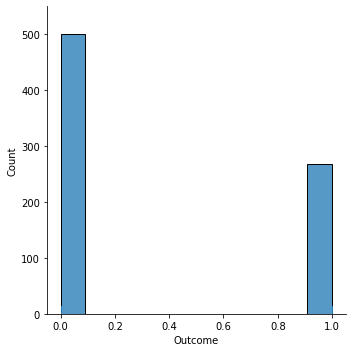

In [ ]:
#Data Visualisation
sns.displot(df['Outcome'],rug=True)
plt.show()

p=sns.pairplot(df, hue = 'Outcome')

In [ ]:
# prepate the feature vector x and the outcome vector y
X = df.drop(['Outcome'], axis = 1)
Y = df['Outcome'].values

#split the data into training and testing datasets
(x_train, x_test, y_train, y_test) = train_test_split(X, Y, test_size=0.3, random_state=40)
x_train


# Prepare the scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# fit the scaler on the training data only (i.e., the parameters of the standardization should use the training data only)
#  Note : the testing dataset should never be used for fit the scaler
sc.fit(x_train)

x_train = sc.transform(x_train) #Scale the traning dataset with the Scaler fitted on the training parameters
x_test = sc.transform(x_test) #Scale the testing dataset with the Scaler fitted on the training parameters


In [ ]:
# create the model
modl = Sequential()

#add the input layer with 8 nodes and ReLU activation
modl.add(Dense(10, input_dim=8, activation='relu'))

#add one middle layer with 8 nodes and ReLU activation
modl.add(Dense(8, activation='relu'))

#add the input layer with 1 node anda sigmoid function
modl.add(Dense(1,  activation='sigmoid'))

# compile the model
modl.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])




In [ ]:
#Visualise Neural Network Using Keras library
from ann_visualizer.visualize import ann_viz
import graphviz

# generate a NN graph and save it in  a file in Graphviz format with  extension .gv
ann_viz(modl,filename='nn_model.gv',title='Neural Network')

#read the .gv file (i.e., the NN graph) into the variablle gfile
gfile = graphviz.Source.from_file('nn_model.gv')

#display the model image (in gfile) on the screen
gfile

In [ ]:
#Optimize the model: finetune the hyperparameter
from scikeras.wrappers import KerasClassifier, KerasRegressor
from sklearn.model_selection import GridSearchCV
optimal = KerasClassifier(model=modl)
params={'batch_size':[100, 20, 50, 25, 32], 
        'epochs':[100, 150]         
        }

optimalmodel=GridSearchCV(estimator=optimal, param_grid=params, cv=3)
optimalmodel.fit(x_train, y_train, verbose=0)


optimalmodel_pred = optimalmodel.predict(x_test)
optimalmodel_auc_roc = accuracy_score(y_test, optimalmodel_pred.round())*100
print("Best parameters: ", optimalmodel.best_params_)
print("Best accuracy score: ", optimalmodel.best_score_ *100)
print("Optimal AUC on the testing dataset:%. ", optimalmodel_auc_roc)


#Create and print the Confusion Matrix for the model using testing dataset
print('Confusion Matrix for The Model Using Testing dataset:')
confusionmatrix= confusion_matrix(y_test, optimalmodel_pred.round())
sns.heatmap(confusionmatrix,annot=True,cmap="Blues",fmt="d",cbar=False)